In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical
import matplotlib.pyplot as plt  # Built-in Matplotlib
import seaborn as sns  # For graphical
import sqlite3
connect = sqlite3.connect('Iccountant.db')
cursor = connect.cursor()

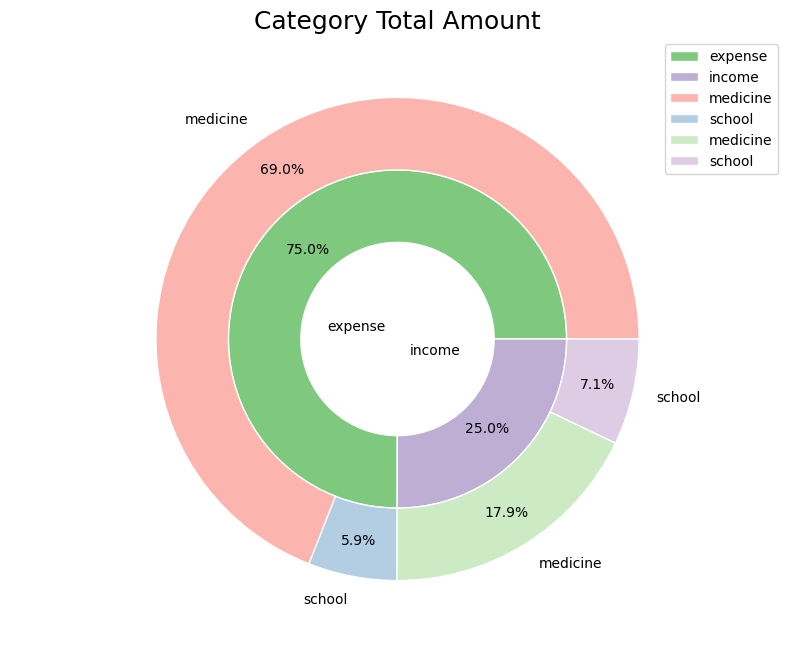

In [2]:
category_in_total_amount = pd.read_sql_query("SELECT ty.type_name AS Type, c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 1 AND t.user_id = 1 GROUP BY t.cat_id", connect)
dataframe = pd.DataFrame(category_in_total_amount)
type_in_total = dataframe['Type'].values.tolist()
category_in_total = dataframe['Category'].values.tolist()
amount_in_total = dataframe['Amount'].values.tolist()
category_ex_total_amount = pd.read_sql_query("SELECT ty.type_name AS Type, c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 2 AND t.user_id = 1 GROUP BY t.cat_id", connect)
datafram = pd.DataFrame(category_ex_total_amount)
type_ex_total = datafram['Type'].values.tolist()
category_ex_total = datafram['Category'].values.tolist()
amount_ex_total = datafram['Amount'].values.tolist()
type_total_combine = type_in_total + type_ex_total
category_total_combine = category_in_total + category_ex_total
amount_total_combine = amount_in_total + amount_ex_total
datafra = pd.DataFrame(list(zip(type_total_combine, category_total_combine, amount_total_combine)), columns =['Type', 'Category', 'Amount'])
inner = datafra.groupby('Type').sum()
outer = datafra.groupby(['Type', 'Category']).sum()
outer_labels = outer.index.get_level_values(1)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')
color = sns.color_palette("Pastel1")
colors = sns.color_palette("Accent")
ax.pie(inner.values.flatten(), radius=0.7, labels=inner.index, autopct='%1.1f%%', labeldistance=0.1, pctdistance=0.75, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(outer.values.flatten(), radius=1, labels=outer_labels, autopct='%1.1f%%', pctdistance=0.85, colors=color, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Category Total Amount", fontsize=18)
plt.legend()
plt.show()

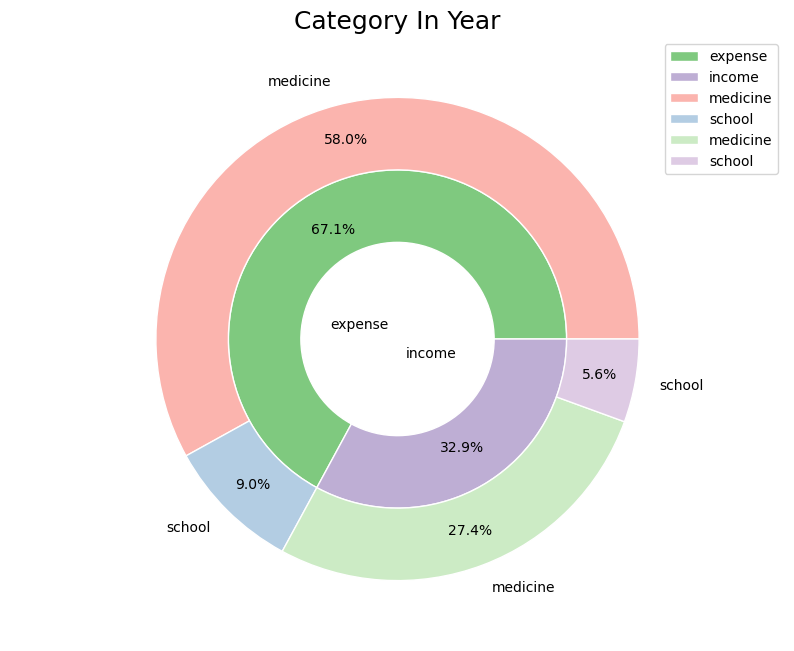

In [3]:
category_in_year_amount = pd.read_sql_query("SELECT ty.type_name AS Type, c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.cat_id", connect)
dataframe = pd.DataFrame(category_in_year_amount)
type_in_year = dataframe['Type'].values.tolist()
category_in_year = dataframe['Category'].values.tolist()
amount_in_year = dataframe['Amount'].values.tolist()
category_ex_year_amount = pd.read_sql_query("SELECT ty.type_name AS Type, c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.cat_id", connect)
datafram = pd.DataFrame(category_ex_year_amount)
type_ex_year = datafram['Type'].values.tolist()
category_ex_year = datafram['Category'].values.tolist()
amount_ex_year = datafram['Amount'].values.tolist()
type_year_combine = type_in_year + type_ex_year
category_year_combine = category_in_year + category_ex_year
amount_year_combine = amount_in_year + amount_ex_year
datafra = pd.DataFrame(list(zip(type_year_combine, category_year_combine, amount_year_combine)), columns =['Type', 'Category', 'Amount'])
inner = datafra.groupby('Type').sum()
outer = datafra.groupby(['Type', 'Category']).sum()
outer_labels = outer.index.get_level_values(1)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')
color = sns.color_palette("Pastel1")
colors = sns.color_palette("Accent")
ax.pie(inner.values.flatten(), radius=0.7, labels=inner.index, autopct='%1.1f%%', labeldistance=0.1, pctdistance=0.75, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(outer.values.flatten(), radius=1, labels=outer_labels, autopct='%1.1f%%', pctdistance=0.85, colors=color, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Category In Year", fontsize=18)
plt.legend()
plt.show()

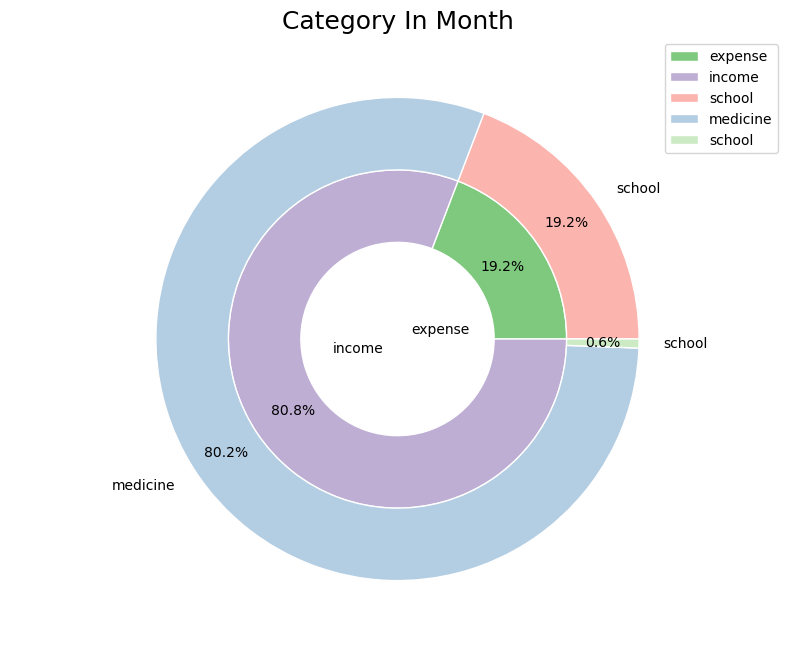

In [4]:
category_in_month_amount = pd.read_sql_query("SELECT ty.type_name AS Type, c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.cat_id", connect)
dataframe = pd.DataFrame(category_in_month_amount)
type_in_month = dataframe['Type'].values.tolist()
category_in_month = dataframe['Category'].values.tolist()
amount_in_month = dataframe['Amount'].values.tolist()
category_ex_month_amount = pd.read_sql_query("SELECT ty.type_name AS Type, c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.cat_id", connect)
datafram = pd.DataFrame(category_ex_month_amount)
type_ex_month = datafram['Type'].values.tolist()
category_ex_month = datafram['Category'].values.tolist()
amount_ex_month = datafram['Amount'].values.tolist()
type_month_combine = type_in_month + type_ex_month
category_month_combine = category_in_month + category_ex_month
amount_month_combine = amount_in_month + amount_ex_month
datafra = pd.DataFrame(list(zip(type_month_combine, category_month_combine, amount_month_combine)), columns =['Type', 'Category', 'Amount'])
inner = datafra.groupby('Type').sum()
outer = datafra.groupby(['Type', 'Category']).sum()
outer_labels = outer.index.get_level_values(1)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')
color = sns.color_palette("Pastel1")
colors = sns.color_palette("Accent")
ax.pie(inner.values.flatten(), radius=0.7, labels=inner.index, autopct='%1.1f%%', labeldistance=0.1, pctdistance=0.75, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(outer.values.flatten(), radius=1, labels=outer_labels, autopct='%1.1f%%', pctdistance=0.85, colors=color, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Category In Month", fontsize=18)
plt.legend()
plt.show()

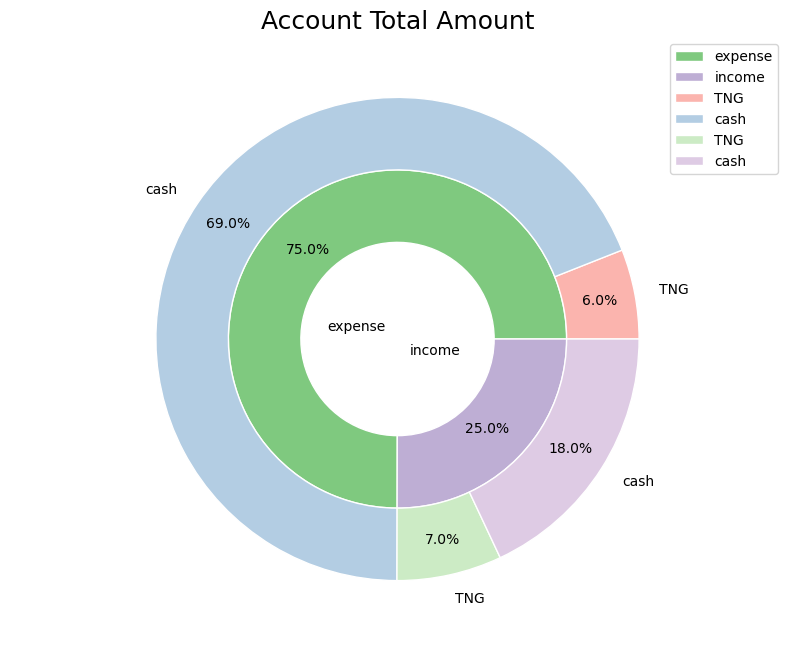

In [5]:
account_in_total_amount = pd.read_sql_query("SELECT ty.type_name AS Type, a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 1 AND t.user_id = 1 GROUP BY t.acc_id", connect)
datafr = pd.DataFrame(account_in_total_amount)
type_in_total = datafr['Type'].values.tolist()
account_in_total = datafr['Account'].values.tolist()
amount_in_total = datafr['Amount'].values.tolist()
category_ex_total_amount = pd.read_sql_query("SELECT ty.type_name AS Type, a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 2 AND t.user_id = 1 GROUP BY t.acc_id", connect)
dataf = pd.DataFrame(category_ex_total_amount)
type_ex_total = dataf['Type'].values.tolist()
account_ex_total = dataf['Account'].values.tolist()
amount_ex_total = dataf['Amount'].values.tolist()
type_total_combine = type_in_total + type_ex_total
account_total_combine = account_in_total + account_ex_total
amount_total_combine = amount_in_total + amount_ex_total
data = pd.DataFrame(list(zip(type_total_combine, account_total_combine, amount_total_combine)), columns =['Type', 'Account', 'Amount'])
inner = data.groupby('Type').sum()
outer = data.groupby(['Type', 'Account']).sum()
outer_labels = outer.index.get_level_values(1)
fig1, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')
color = sns.color_palette("Pastel1")
colors = sns.color_palette("Accent")
ax.pie(inner.values.flatten(), radius=0.7, labels=inner.index, autopct='%1.1f%%', labeldistance=0.1, pctdistance=0.75, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(outer.values.flatten(), radius=1, labels=outer_labels, autopct='%1.1f%%', pctdistance=0.85, colors=color, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Account Total Amount", fontsize=18)
plt.legend()
plt.show()

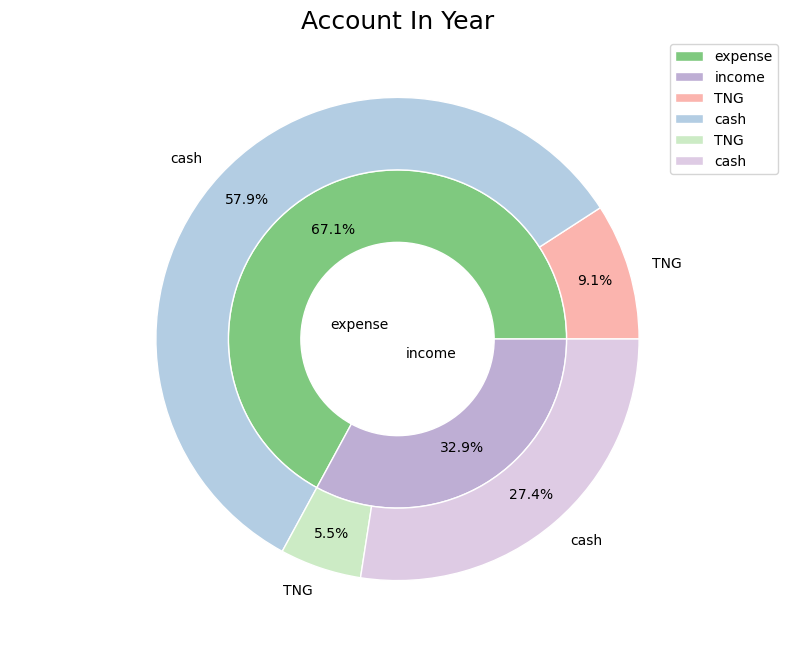

In [6]:
account_in_year_amount = pd.read_sql_query("SELECT ty.type_name AS Type, a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.acc_id", connect)
datafr = pd.DataFrame(account_in_year_amount)
type_in_year = datafr['Type'].values.tolist()
account_in_year = datafr['Account'].values.tolist()
amount_in_year = datafr['Amount'].values.tolist()
category_ex_year_amount = pd.read_sql_query("SELECT ty.type_name AS Type, a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.acc_id", connect)
dataf = pd.DataFrame(category_ex_year_amount)
type_ex_year = dataf['Type'].values.tolist()
account_ex_year = dataf['Account'].values.tolist()
amount_ex_year = dataf['Amount'].values.tolist()
type_year_combine = type_in_year + type_ex_year
account_year_combine = account_in_year + account_ex_year
amount_year_combine = amount_in_year + amount_ex_year
data = pd.DataFrame(list(zip(type_year_combine, account_year_combine, amount_year_combine)), columns =['Type', 'Account', 'Amount'])
inner = data.groupby('Type').sum()
outer = data.groupby(['Type', 'Account']).sum()
outer_labels = outer.index.get_level_values(1)
fig1, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')
color = sns.color_palette("Pastel1")
colors = sns.color_palette("Accent")
ax.pie(inner.values.flatten(), radius=0.7, labels=inner.index, autopct='%1.1f%%', labeldistance=0.1, pctdistance=0.75, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(outer.values.flatten(), radius=1, labels=outer_labels, autopct='%1.1f%%', pctdistance=0.85, colors=color, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Account In Year", fontsize=18)
plt.legend()
plt.show()

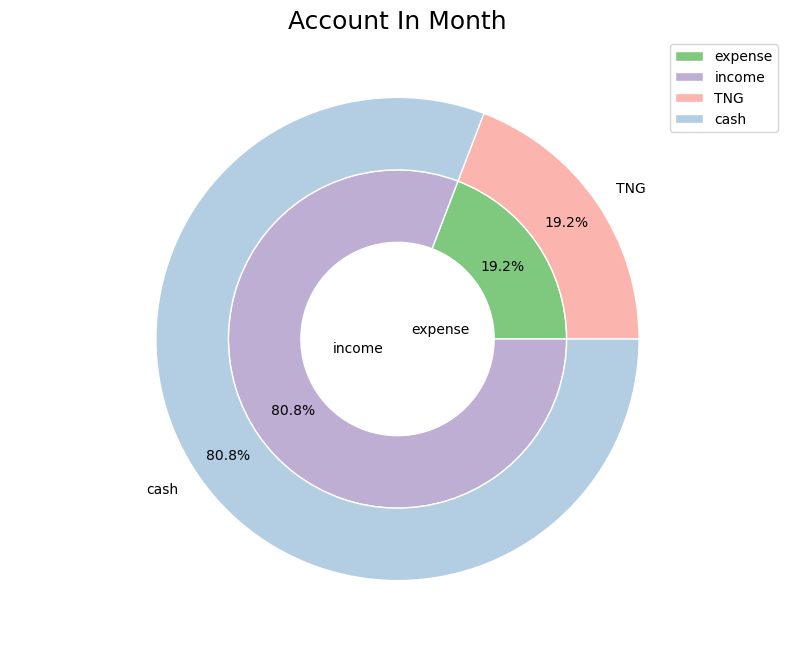

In [7]:
account_in_month_amount = pd.read_sql_query("SELECT ty.type_name AS Type, a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.acc_id", connect)
datafr = pd.DataFrame(account_in_month_amount)
type_in_month = datafr['Type'].values.tolist()
account_in_month = datafr['Account'].values.tolist()
amount_in_month = datafr['Amount'].values.tolist()
category_ex_month_amount = pd.read_sql_query("SELECT ty.type_name AS Type, a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.acc_id", connect)
dataf = pd.DataFrame(category_ex_month_amount)
type_ex_month = dataf['Type'].values.tolist()
account_ex_month = dataf['Account'].values.tolist()
amount_ex_month = dataf['Amount'].values.tolist()
type_month_combine = type_in_month + type_ex_month
account_month_combine = account_in_month + account_ex_month
amount_month_combine = amount_in_month + amount_ex_month
data = pd.DataFrame(list(zip(type_month_combine, account_month_combine, amount_month_combine)), columns =['Type', 'Account', 'Amount'])
inner = data.groupby('Type').sum()
outer = data.groupby(['Type', 'Account']).sum()
outer_labels = outer.index.get_level_values(1)
fig1, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')
color = sns.color_palette("Pastel1")
colors = sns.color_palette("Accent")
ax.pie(inner.values.flatten(), radius=0.7, labels=inner.index, autopct='%1.1f%%', labeldistance=0.1, pctdistance=0.75, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(outer.values.flatten(), radius=1, labels=outer_labels, autopct='%1.1f%%', pctdistance=0.85, colors=color, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Account In Month", fontsize=18)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Total Income in Category')

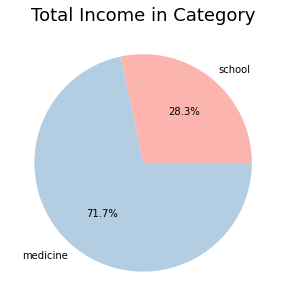

In [8]:
category_in_total_amount = pd.read_sql_query("SELECT c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 1 AND t.user_id = 1 GROUP BY t.cat_id", connect)
dataframe = pd.DataFrame(category_in_total_amount)
category_in_total = dataframe['Category'].values.tolist()
amount_in_total = dataframe['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_in_total, labels=category_in_total, autopct='%1.1f%%', colors=colors)
plt.title("Total Income in Category", fontsize=18)

Text(0.5, 1.0, 'Total Expense in Category')

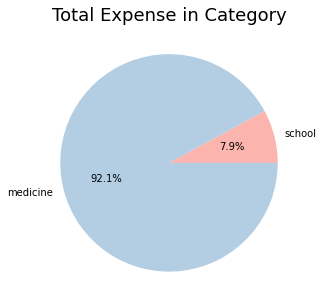

In [9]:
category_ex_total_amount = pd.read_sql_query("SELECT c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 2 AND t.user_id = 1 GROUP BY t.cat_id", connect)
datafram = pd.DataFrame(category_ex_total_amount)
category_ex_total = datafram['Category'].values.tolist()
amount_ex_total = datafram['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_ex_total, labels=category_ex_total, autopct='%1.1f%%', colors=colors)
plt.title("Total Expense in Category", fontsize=18)

Text(0.5, 1.0, 'Income in Category - Year')

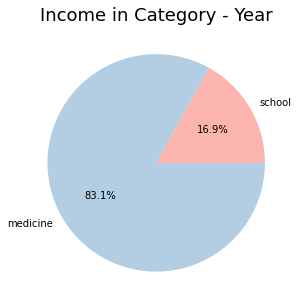

In [10]:
category_in_year_amount = pd.read_sql_query("SELECT c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.cat_id", connect)
dataframe = pd.DataFrame(category_in_year_amount)
category_in_year = dataframe['Category'].values.tolist()
amount_in_year = dataframe['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_in_year, labels=category_in_year, autopct='%1.1f%%', colors=colors)
plt.title("Income in Category - Year", fontsize=18)

Text(0.5, 1.0, 'Expense in Category - Year')

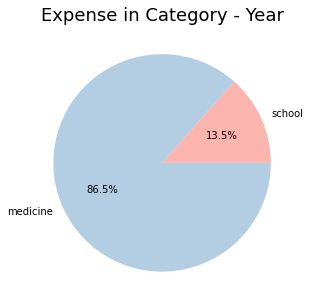

In [11]:
category_ex_year_amount = pd.read_sql_query("SELECT c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.cat_id", connect)
datafram = pd.DataFrame(category_ex_year_amount)
category_ex_year = datafram['Category'].values.tolist()
amount_ex_year = datafram['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_ex_year, labels=category_ex_year, autopct='%1.1f%%', colors=colors)
plt.title("Expense in Category - Year", fontsize=18)

Text(0.5, 1.0, 'Income in Category - Month')

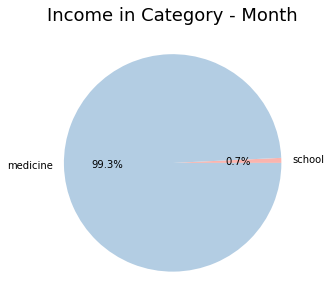

In [12]:
category_in_month_amount = pd.read_sql_query("SELECT c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.cat_id", connect)
dataframe = pd.DataFrame(category_in_month_amount)
category_in_month = dataframe['Category'].values.tolist()
amount_in_month = dataframe['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_in_month, labels=category_in_month, autopct='%1.1f%%', colors=colors)
plt.title("Income in Category - Month", fontsize=18)

Text(0.5, 1.0, 'Expense in Category - Month')

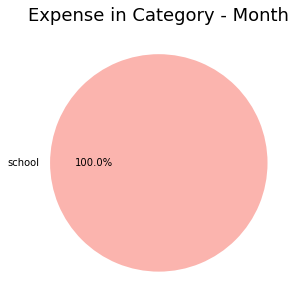

In [13]:
category_ex_month_amount = pd.read_sql_query("SELECT c.cat_name AS Category, sum(t.amount) AS Amount FROM transactions t, category c, type ty WHERE c.cat_id = t.cat_id AND t.user_id = c.user_id AND t.type_id = ty.type_id AND t.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.cat_id", connect)
datafram = pd.DataFrame(category_ex_month_amount)
category_ex_month = datafram['Category'].values.tolist()
amount_ex_month = datafram['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_ex_month, labels=category_ex_month, autopct='%1.1f%%', colors=colors)
plt.title("Expense in Category - Month", fontsize=18)

Text(0.5, 1.0, 'Total Income in Account')

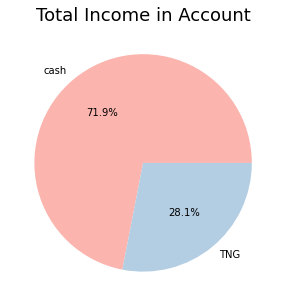

In [14]:
account_in_total_amount = pd.read_sql_query("SELECT a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 1 AND t.user_id = 1 GROUP BY t.acc_id", connect)
datafr = pd.DataFrame(account_in_total_amount)
account_in_total = datafr['Account'].values.tolist()
amount_in_total = datafr['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_in_total, labels=account_in_total, autopct='%1.1f%%', colors=colors)
plt.title("Total Income in Account", fontsize=18)

Text(0.5, 1.0, 'Total Expense in Account')

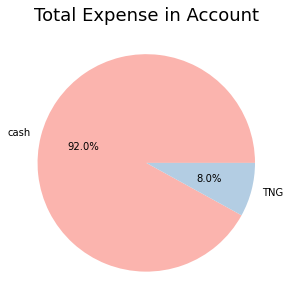

In [15]:
category_ex_total_amount = pd.read_sql_query("SELECT a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 2 AND t.user_id = 1 GROUP BY t.acc_id", connect)
dataf = pd.DataFrame(category_ex_total_amount)
account_ex_total = dataf['Account'].values.tolist()
amount_ex_total = dataf['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_ex_total, labels=account_ex_total, autopct='%1.1f%%', colors=colors)
plt.title("Total Expense in Account", fontsize=18)

Text(0.5, 1.0, 'Income in Account - Year')

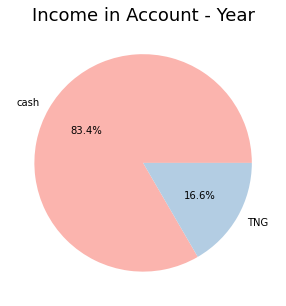

In [16]:
account_in_year_amount = pd.read_sql_query("SELECT a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.acc_id", connect)
datafr = pd.DataFrame(account_in_year_amount)
account_in_year = datafr['Account'].values.tolist()
amount_in_year = datafr['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_in_year, labels=account_in_year, autopct='%1.1f%%', colors=colors)
plt.title("Income in Account - Year", fontsize=18)

Text(0.5, 1.0, 'Expense in Account - Year')

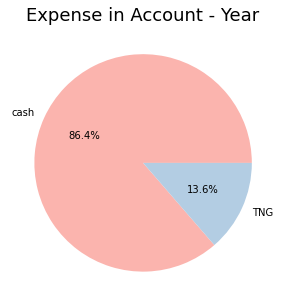

In [17]:
category_ex_year_amount = pd.read_sql_query("SELECT a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' GROUP BY t.acc_id", connect)
dataf = pd.DataFrame(category_ex_year_amount)
account_ex_year = dataf['Account'].values.tolist()
amount_ex_year = dataf['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_ex_year, labels=account_ex_year, autopct='%1.1f%%', colors=colors)
plt.title("Expense in Account - Year", fontsize=18)

Text(0.5, 1.0, 'Income in Account - Month')

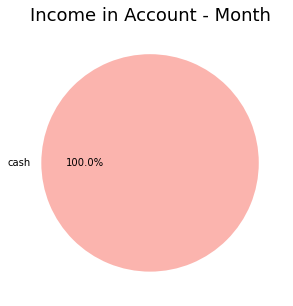

In [18]:
account_in_month_amount = pd.read_sql_query("SELECT a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 1 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.acc_id", connect)
datafr = pd.DataFrame(account_in_month_amount)
account_in_month = datafr['Account'].values.tolist()
amount_in_month = datafr['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_in_month, labels=account_in_month, autopct='%1.1f%%', colors=colors)
plt.title("Income in Account - Month", fontsize=18)

Text(0.5, 1.0, 'Expense in Account - Month')

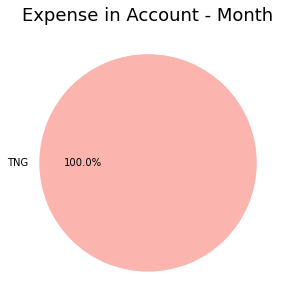

In [19]:
category_ex_month_amount = pd.read_sql_query("SELECT a.acc_name AS Account, sum(t.amount) AS Amount FROM type ty, account a, transactions t, user u WHERE ty.type_id = t.type_id AND a.acc_id = t.acc_id AND a.user_id = t.user_id = u.user_id AND ty.type_id = 2 AND t.user_id = 1 AND strftime('%Y', t.date) = '2022' AND strftime('%m', t.date) = '08' GROUP BY t.acc_id", connect)
dataf = pd.DataFrame(category_ex_month_amount)
account_ex_month = dataf['Account'].values.tolist()
amount_ex_month = dataf['Amount'].values.tolist()
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(5,5))
plt.pie(amount_ex_month, labels=account_ex_month, autopct='%1.1f%%', colors=colors)
plt.title("Expense in Account - Month", fontsize=18)